In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def convertData(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        if unsigned & (1 << 15) !=0:
            unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned / (1<< leftShift)
    return data

def convertDataHex(data, column, leftShift):
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)

        #if unsigned & (1 << 15) !=0:
        unsigned = -1*((1<<15)-(unsigned &((1<<15)-1)))
        
        data.loc[i,column] = unsigned / (1<< leftShift)
    return data

def _str_to_int(data, column):
    """ Transform hex str into int. """
    for i in range(len(data)):
        temp = data.loc[i, column]
        unsigned = int(temp,16)
        if unsigned >= 2**7:
            unsigned -= 2**8
        data.loc[i,column] = unsigned
    
    return data

# Conversio dades de temps a timestamp
def dateChange(data):
    fin = data.shape[0]
    i=0

    while i < fin:
        now = ("06/02/2022 " + data.at[i,"time"])
        date = datetime.strptime(now, "%m/%d/%Y %H:%M:%S.%f")
        timestamp = datetime.timestamp(date)
        data.at[i,"time"]= timestamp
        i=i+1


def all_non_consecutive(arr):
    ans = []
    start = arr[0]
    index = 0
    for number in arr:
        if start == number:
            start += 1
            index += 1
            continue

        ans.append({'i': index, 'n': number})
        start = number + 1
        index += 1

    return ans

In [3]:
def grafica(llista):
    temp = all_non_consecutive(llista)
    llista_resultat=[]
    aux_llista=[]
    aux_llista.append(llista[0])
    for i in temp:
        aux_llista.append(llista[i["i"]-1])
        aux_llista.append(i["n"])
    aux_llista.append(llista[-1])

    print(aux_llista)
    i=0
    while i < len(aux_llista):
        #balance_test.loc[aux_llista[i]:aux_llista[i+1]].plot(subplots=True, layout=())
        #new_df = balance_test[["accelerometerX","accelerometerY","accelerometerZ"]]
        new_df = balance_test.loc[aux_llista[i]:aux_llista[i+1]]
        new_df.reset_index(inplace=True, drop=True)
        llista_resultat.append(new_df)
        i=i+2
    return llista_resultat


In [35]:
dades = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/ID_vm54f_DATA_15-03-2023_HORA_17-07-28.351.csv", delimiter=";")
dades

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,FBDB,000A,FFC9,FFF5,FDDF,FF7B,...,0000,C11C5009,3F585BF6,BDFAAEB8,1698BAB7,29323536,1366C86A,D91E0EAE,NaN,NaN
1,1678895197569,vm54f,0,0,FC07,002C,FFB5,000E,FDF1,FF5A,...,0000,C11C5D85,3F4FC745,BD89E7F1,1699F9E5,290B7A54,136D1937,D8F90BCD,NaN,NaN
2,1678895197572,vm54f,0,0,FC08,0042,FFA9,FFFB,FE85,FF94,...,FE1B,C11C6B01,3F4629CD,BC21CF4A,16943099,28E5098F,136F2071,D8CE718E,NaN,NaN
3,1678895197592,vm54f,0,0,FBF0,0045,FF8F,FFE9,FE47,FFBF,...,0000,C11C725C,3F4039C5,3CD2D7CD,1647637A,28F10CD5,13241B6D,D88A58F4,NaN,NaN
4,1678895197618,vm54f,0,0,FC20,0029,FF77,003B,FDB0,FFF0,...,0000,C11C7609,3F3CD0FB,3D57BF0E,1646EE54,28DFE65C,13232CCB,D877E086,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,FC11,0050,000D,FF3F,0018,FFEF,...,0000,C11C7433,3F3EB181,3CC695AD,F43EA36F,2AA25733,F0FDF8D3,D43D8907,NaN,NaN
50067,1678896448052,vm54f,0,0,FC06,0048,0006,FF45,0005,FFDB,...,0000,C11C7396,3F3F09C4,3CD0642D,F44E0A23,2AA67EF2,F10BC6C4,D438BBB7,NaN,NaN
50068,1678896448082,vm54f,0,0,FC01,0046,FFFF,FF5D,FFF3,FFDB,...,0185,C11C756D,3F3DA8BA,3CBE00FC,F459FE3E,2AADD9DD,F11CBE94,D436EEB5,NaN,NaN
50069,1678896448104,vm54f,0,0,FC01,004F,FFF8,FF70,0018,FFC8,...,0000,C11C77E0,3F3BBE64,3CB0850B,F43B5F0F,2AA718E3,F106975B,D4401927,NaN,NaN


In [36]:
#print(dades["time"])
convertData(dades,"accelerometerX",10)
convertData(dades,"accelerometerY",10)
convertData(dades,"accelerometerZ",10)

convertDataHex(dades,"gravityVectorX",10)
convertDataHex(dades,"gravityVectorY",10)
convertDataHex(dades,"gravityVectorZ",10)

convertDataHex(dades,"quaternionW",10)
convertDataHex(dades,"quaternionX",10)
convertDataHex(dades,"quaternionY",10)
convertDataHex(dades,"quaternionZ",10)

convertDataHex(dades,"gyroscopeX",10)
convertDataHex(dades,"gyroscopeY",10)
convertDataHex(dades,"gyroscopeZ",10)
#print(dades)

,time,id,test,action,accelerometerX,accelerometerY,accelerometerZ,gyroscopeX,gyroscopeY,gyroscopeZ,...,compassZ,gravityVectorX,gravityVectorY,gravityVectorZ,quaternionW,quaternionX,quaternionY,quaternionZ,steps,timeSteps
0,1678895197541,vm54f,0,0,-1.036133,0.009766,-0.053711,-0.010742,-0.532227,-0.129883,...,0000,-11.991211,-9.009766,-20.320312,-17.321289,-18.697266,-13.896484,-28.330078,NaN,NaN
1,1678895197569,vm54f,0,0,-0.993164,0.042969,-0.073242,-31.986328,-0.514648,-0.162109,...,0000,-8.620117,-14.182617,-6.014648,-1.526367,-1.417969,-25.696289,-29.049805,NaN,NaN
2,1678895197572,vm54f,0,0,-0.992188,0.064453,-0.084961,-0.004883,-0.370117,-0.105469,...,FE1B,-5.249023,-21.549805,-12.177734,-19.850586,-29.610352,-23.889648,-3.611328,NaN,NaN
3,1678895197592,vm54f,0,0,-1.015625,0.067383,-0.110352,-0.022461,-0.430664,-0.063477,...,0000,-3.410156,-17.557617,-10.049805,-7.130859,-28.791992,-25.143555,-9.761719,NaN,NaN
4,1678895197618,vm54f,0,0,-0.96875,0.040039,-0.133789,-31.942383,-0.578125,-0.015625,...,0000,-2.491211,-11.754883,-16.236328,-4.417969,-6.410156,-20.801758,-7.869141,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,1678896448018,vm54f,0,0,-0.983398,0.078125,0.012695,-0.188477,-31.976562,-0.016602,...,0000,-2.950195,-19.624023,-26.581055,-23.141602,-10.200195,-1.793945,-29.743164,NaN,NaN
50067,1678896448052,vm54f,0,0,-0.994141,0.070312,0.005859,-0.182617,-31.995117,-0.036133,...,0000,-3.103516,-29.558594,-6.956055,-29.46582,-0.263672,-14.308594,-17.071289,NaN,NaN
50068,1678896448082,vm54f,0,0,-0.999023,0.068359,-0.000977,-0.15918,-0.012695,-0.036133,...,0185,-2.643555,-21.818359,-31.753906,-0.439453,-9.53418,-16.355469,-4.323242,NaN,NaN
50069,1678896448104,vm54f,0,0,-0.999023,0.077148,-0.007812,-0.140625,-31.976562,-0.054688,...,0000,-2.03125,-16.402344,-30.739258,-8.235352,-25.77832,-26.161133,-25.711914,NaN,NaN


In [37]:

balance_test = dades.loc[dades["test"]==5, ["action","accelerometerX","accelerometerY","accelerometerZ", "gravityVectorX", "gravityVectorY", "gravityVectorZ", "gyroscopeX", "gyroscopeY", "gyroscopeZ"]]

llista_ROA = balance_test.index[balance_test["action"] == 1].tolist()

llista_ROC = balance_test.index[balance_test["action"] == 2].tolist()
llista_RGA = balance_test.index[balance_test["action"] == 3].tolist()
llista_RGC = balance_test.index[balance_test["action"] == 4].tolist()
balance_test.drop("action", inplace=True, axis=1)


In [6]:
len(llista_RGC)

2357

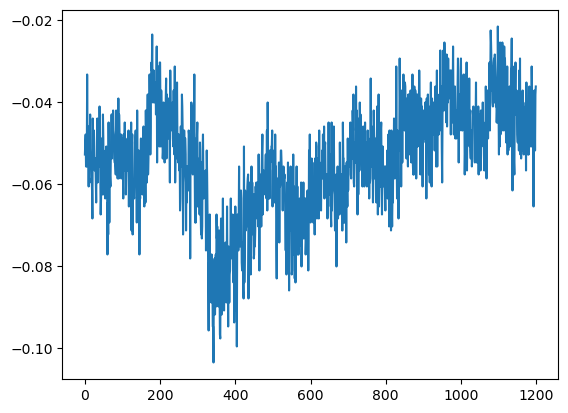

In [7]:
llista = list(range(0,1200))
plt.plot(llista,balance_test.loc[757:1956]["accelerometerZ"])

In [8]:
def find_discontinuity(lst):
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1] + 1:
            return i, lst[i - 1] + 1

    return None

In [9]:
result = find_discontinuity(llista_RGC)

if result:
    index, missing_value = result
    print(f"Discontinuity found at index {index}, missing value is {missing_value}.")
else:
    print("No discontinuity found.")

Discontinuity found at index 1173, missing value is 15859.


In [10]:
RGC1 = [*range(llista_RGC[0], 15859)]

In [11]:
ROA1 = [*range(757,1966)]

In [12]:
llista_ROA[1209]

4283

In [40]:
resultat=[]
resultat=grafica(RGC1)

[14686, 15858]


In [42]:
resultat

[     accelerometerX accelerometerY accelerometerZ gravityVectorX  \
 0         -1.009766       0.103516      -0.013672     -21.337891   
 1         -1.054688       0.129883      -0.003906     -23.483398   
 2         -1.004883       0.132812      -0.045898     -26.241211   
 3         -0.992188       0.072266      -0.044922     -28.999023   
 4         -1.043945       0.064453      -0.035156     -29.765625   
 ...             ...            ...            ...            ...   
 1168      -1.480469      -0.727539        0.59375     -19.010742   
 1169      -1.333008      -0.869141       0.476562       -8.28418   
 1170      -1.063477      -0.277344         0.4375     -16.277344   
 1171      -1.207031       0.113281       0.095703     -17.680664   
 1172      -1.118164       0.366211       0.032227     -29.455078   
 
      gravityVectorY gravityVectorZ gyroscopeX gyroscopeY gyroscopeZ  
 0        -13.234375     -30.689453 -31.869141 -31.788086 -31.862305  
 1        -31.679688     -19

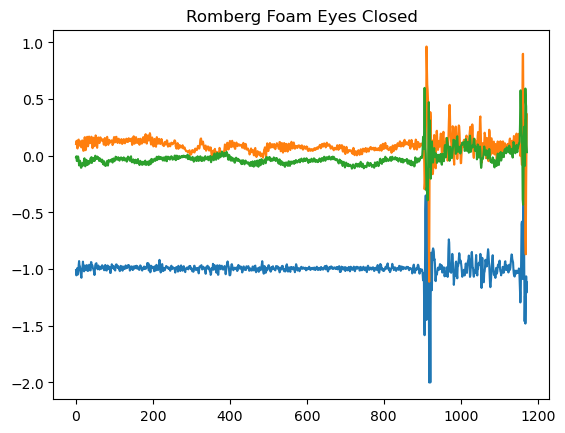

In [38]:
x=0
#for i in resultat:
    #i.plot(ax=axes[1,x] ,title="Espuma Ulls tancats")
resultat[0]["accelerometerX"].plot(title="Romberg Foam Eyes Closed")
resultat[0]["accelerometerY"].plot(title="Romberg Foam Eyes Closed")
resultat[0]["accelerometerZ"].plot(title="Romberg Foam Eyes Closed")

plt.show()

## Comparació força posturògraf amb forces IMU(Normalitzades)

In [17]:
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.preprocessing import normalize

In [18]:
if False:
    reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", chunksize=1)
    df_dades = reader.get_chunk()
    print(df_dades)
    print(df_dades.columns)

    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)

df_dades = reader.get_chunk()
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

[[3.0, 100.0, 64.82313, 100.0, 100.0]]
[[3.0, 100.0, 64.410715, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[2.0, 0.0, 67.411831, 0.0, 0.0]]
[[100.0, 98.864108, 0.0]]
Total tests
10.0


In [19]:
df_dades_postu_FxFy  = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False, nrows = 1200)

In [20]:
df_dades_postu_FxFy.columns

Index(['ROA1_Fx', 'ROA1_Fy', 'ROC2_Fx', 'ROC2_Fy', 'ROA3_Fx', 'ROA3_Fy',
       'ROC4_Fx', 'ROC4_Fy', 'ROA5_Fx', 'ROA5_Fy', 'ROC6_Fx', 'ROC6_Fy',
       'RGA7_Fx', 'RGA7_Fy', 'RGC8_Fx', 'RGC8_Fy', 'RGA9_Fx', 'RGA9_Fy',
       'RGC10_Fx', 'RGC10_Fy', 'Unnamed: 20'],
      dtype='object')

In [21]:
resultat[0]["accelerometerX"]

0      -1.009766
1      -1.054688
2      -1.004883
3      -0.992188
4      -1.043945
          ...   
1168   -1.480469
1169   -1.333008
1170   -1.063477
1171   -1.207031
1172   -1.118164
Name: accelerometerX, Length: 1173, dtype: object

### Força posturógraf

In [55]:
Fx_norm = normalize([np.array(df_dades_postu_FxFy['RGC8_Fx'])])
Fy_norm = normalize([np.array(df_dades_postu_FxFy['RGC8_Fy'])])

llista = list(range(0,len(Fx_norm[0])))

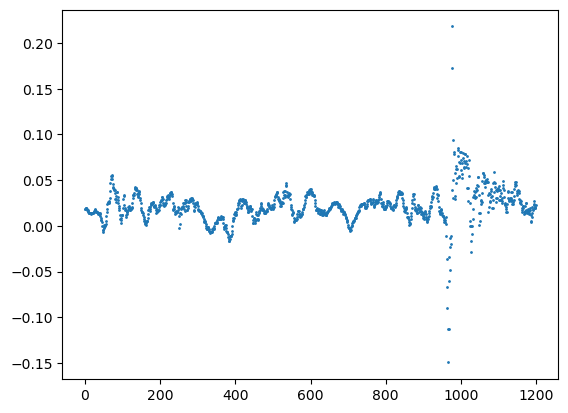

In [56]:
plt.scatter(llista, Fx_norm[0], s = 1)

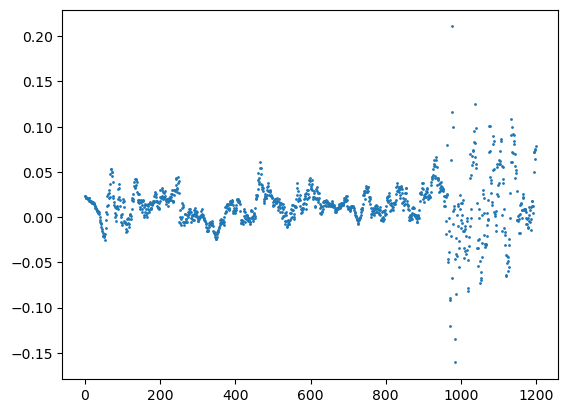

In [24]:
plt.scatter(llista, Fy_norm[0], s = 1)

### Accelerómetre 

In [57]:
Fz_norm_IMU = normalize([resultat[0]["accelerometerZ"]*56.377728*9.81]) 
Fx_norm_IMU = normalize([resultat[0]["accelerometerX"]*56.377728*9.81]) 
Fy_norm_IMU = normalize([resultat[0]["accelerometerY"]*56.377728*9.81]) 

llista = list(range(0,len(Fz_norm_IMU[0])))

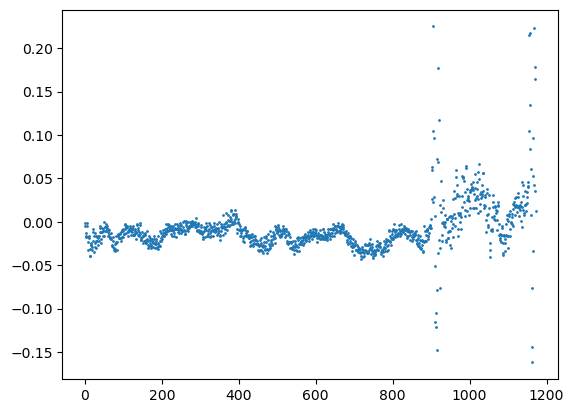

In [58]:
plt.scatter(llista, Fz_norm_IMU[0], s = 1)

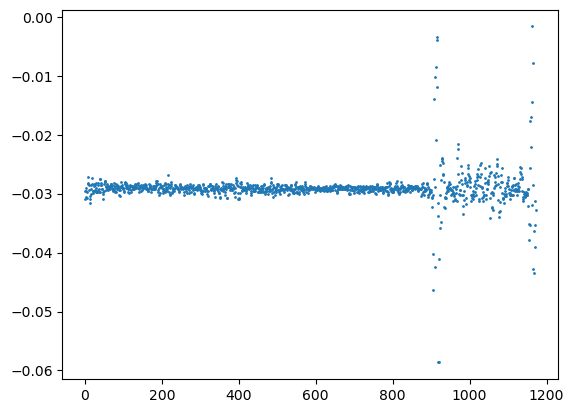

In [49]:
plt.scatter(llista, Fx_norm_IMU[0][0:1200], s = 1)

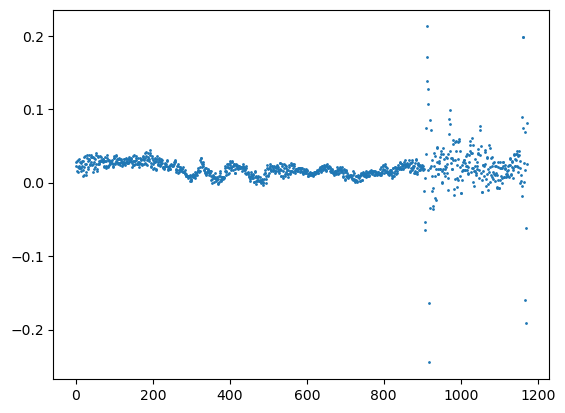

In [50]:
plt.scatter(llista, Fy_norm_IMU[0][0:1200], s = 1)

### Vector Gravity

In [29]:
Fz_norm_IMU_gravity = normalize([resultat[0]["gravityVectorZ"]*56.377728])
Fx_norm_IMU_gravity = normalize([resultat[0]["gravityVectorX"]*56.377728])
Fy_norm_IMU_gravity = normalize([resultat[0]["gravityVectorY"]*56.377728])

llista = list(range(0,len(Fz_norm_IMU_gravity[0])))

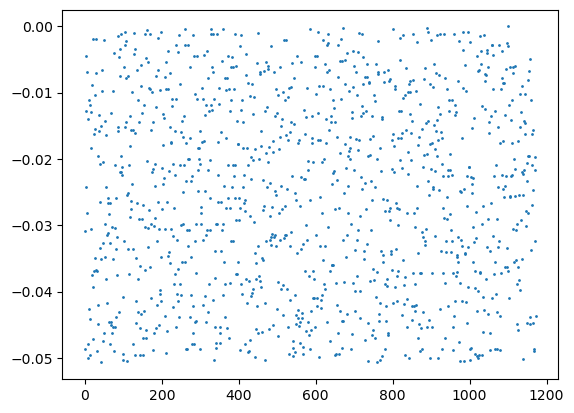

In [30]:
plt.scatter(llista, Fz_norm_IMU_gravity[0], s = 1)

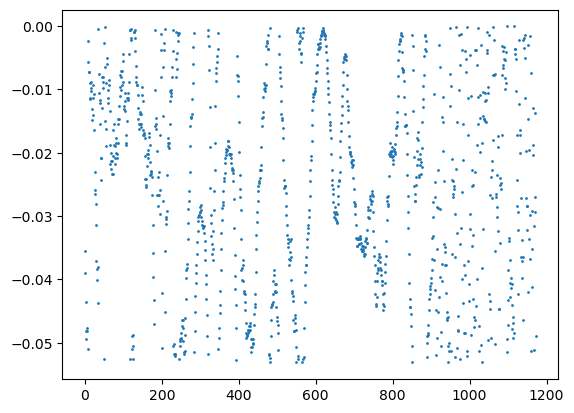

In [31]:
plt.scatter(llista, Fx_norm_IMU_gravity[0], s = 1)

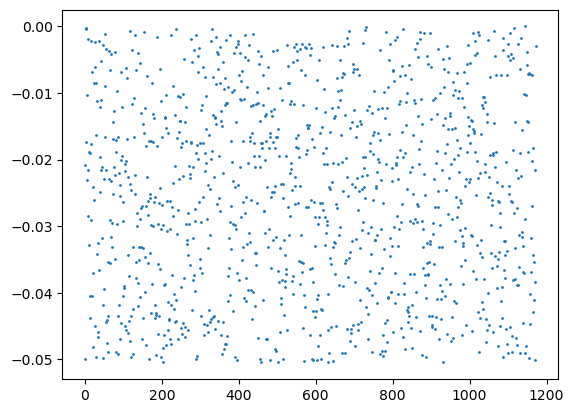

In [32]:
plt.scatter(llista, Fy_norm_IMU_gravity[0], s = 1)

In [43]:
Gz_norm_IMU = normalize([resultat[0]["gyroscopeZ"]])
Gx_norm_IMU = normalize([resultat[0]["gyroscopeX"]])
Gy_norm_IMU = normalize([resultat[0]["gyroscopeY"]])

llista = list(range(0,len(Gz_norm_IMU[0])))

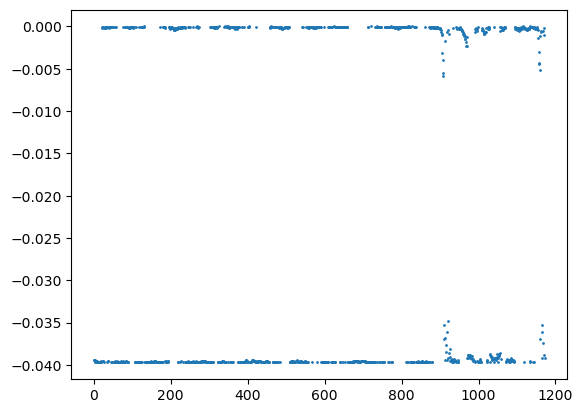

In [44]:
plt.scatter(llista, Gy_norm_IMU[0], s = 1)

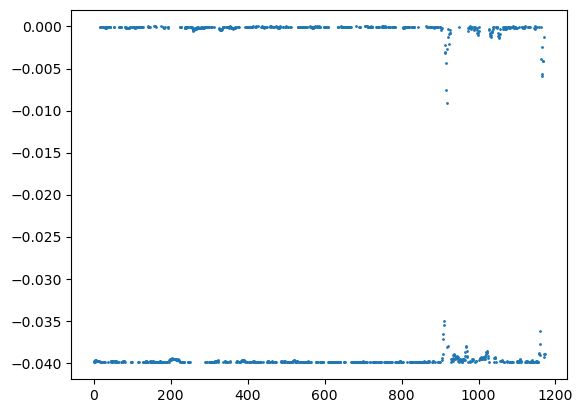

In [45]:
plt.scatter(llista, Gx_norm_IMU[0], s = 1)

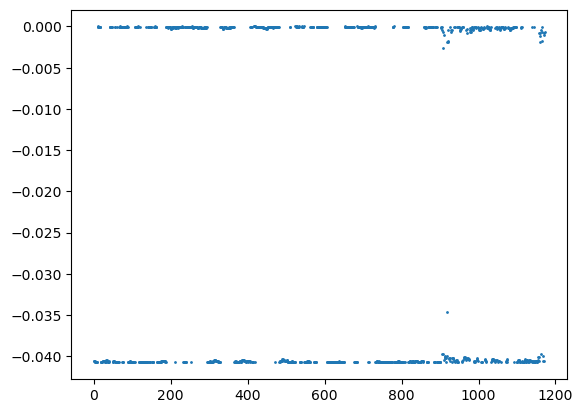

In [46]:
plt.scatter(llista, Gz_norm_IMU[0], s = 1)

## Representació quaternions

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import quaternion as qu

def plot_quaternion(q):
    # Extract quaternion components
    scalar_part = q.real
    vector_part = q.imag

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the quaternion components
    ax.quiver(0, 0, 0, vector_part[0], vector_part[1], vector_part[2], color='b', label='Vector Part')
    ax.quiver(0, 0, 0, scalar_part, 0, 0, color='r', label='Scalar Part')

    # Set axis limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('Quaternion Visualization')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

# Example usage
q = quaternion(0.707, 0, 0.707, 0)
plot_quaternion(q)

NameError: name 'quaternion' is not defined